Sequential Chat : Nested Chat Reflection

# Multi-agents

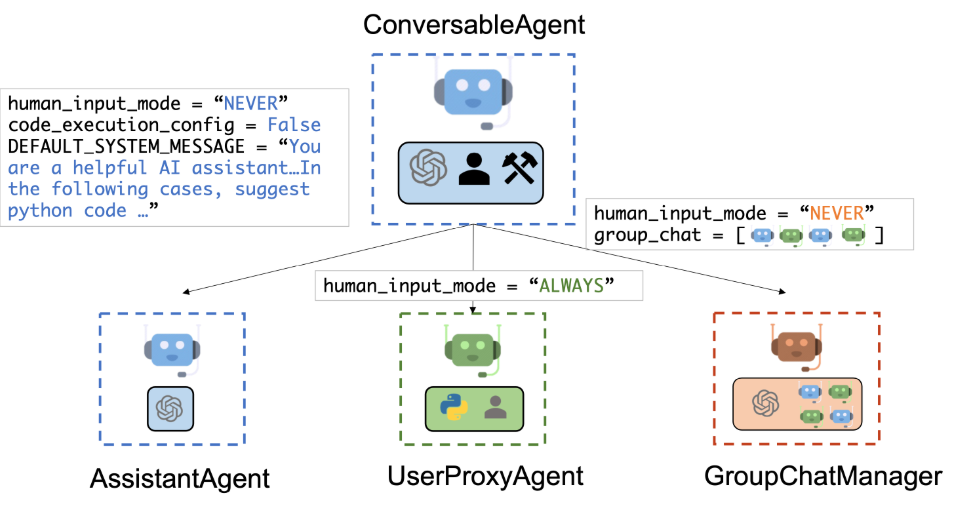

In [1]:
import os 
import autogen
from dotenv import load_dotenv
from autogen import ConversableAgent
from autogen import initiate_chats

load_dotenv(override=True)
api_key = os.getenv('OPENAI_API_KEY')

In [2]:
#llm configuration
llm_config = {
    "model":"gpt-4o-mini",
    "api_key":api_key
}

# Single agent refinement

In [4]:
task = '''
        Write a concise but engaging blogpost about
        https://medium.com/. Make sure the blogpost is 
        within 200 words.
        '''

In [8]:
writer = autogen.AssistantAgent(
    name = 'Writer',
    system_message= "You are a writer. You write engaging and concise"
        "blogposts(with title) on given topics. You must polish your"
        "writing based on the feedback you receive and give refined"
        "version. Only return you final work without additional comments",
    llm_config = llm_config,
)

In [17]:
reply = writer.generate_reply(messages=[{"content": task, "role": "user"}])
print(reply)

**Discovering Stories on Medium: A Hub of Inspiration and Ideas**

Medium.com is more than just a blogging platform; it's a vibrant community driven by stories, insights, and diverse perspectives. Founded in 2012, Medium has revolutionized the way we consume content, allowing writers and readers to connect in meaningful ways.

What sets Medium apart is its focus on quality over quantity. Readers can explore a myriad of topics—from technology and politics to personal development and art. Its clean, minimalist interface enhances the reading experience, making it easy to dive into thought-provoking articles. The platform’s unique recommendation algorithm curates content tailored to individual interests, ensuring that every visit can lead to new discoveries.

For writers, Medium offers a space to share their voice and reach a wider audience without the traditional constraints of blogging. The Partner Program allows content creators to monetize their work, fostering a sustainable writing en

# Two-agents reflection: refinement


 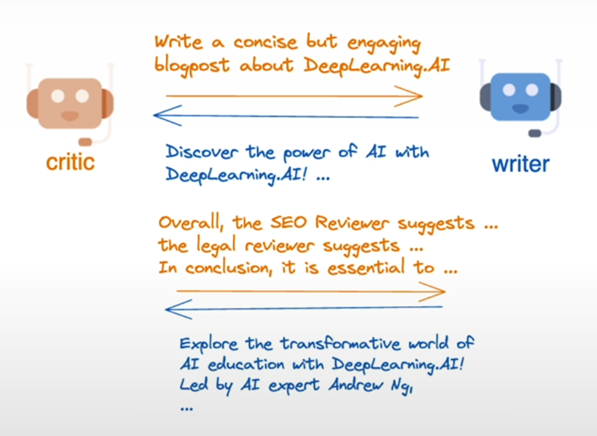

In [37]:
## Agent 1
writer = autogen.AssistantAgent(
    name = 'Writer',
    system_message= "You are a writer. You write engaging and concise"
        "blogposts(with title) on given topics. You must polish your"
        "writing based on the feedback you receive and give refined"
        "version. Only return you final work without additional comments",
    llm_config = llm_config,
)
## Agent 2
critic = autogen.AssistantAgent(
    name = 'Critic',
    system_message="You are a critic. You review the work of"
                    "the writer and provide constructive"
                    "feedback to help improve the quality of the content.",
    llm_config = llm_config,
)

In [39]:
#instantiate the conv between 2 agents 
chat_result= critic.initiate_chat(
    recipient=writer,
    message=task,
    max_turns=2,
    summary_method="last_msg"
)

Critic (to Writer):


        Write a concise but engaging blogpost about
        https://medium.com/. Make sure the blogpost is 
        within 200 words.
        

--------------------------------------------------------------------------------
Writer (to Critic):

**Discovering Medium: A Platform for Thoughtful Voices**

In an age where content is abundant yet often lacks depth, Medium emerges as a refreshing oasis for writers and readers alike. Launched in 2012, this online publishing platform allows individuals to share stories, ideas, and insights, breaking away from the constraints of traditional blogging.

What sets Medium apart is its emphasis on quality over quantity. Writers can be anyone from seasoned authors to budding storytellers, enabling a diverse range of perspectives. The platform’s sleek interface and user-friendly features encourage thoughtful engagement, making it easy to read, clapp, and share ideas with a community of like-minded individuals.

Medium also champi

In [41]:
import pprint
#print last msg from the writer agent
pprint.pprint(chat_result.summary)

('**Discovering Medium: A Platform for Thoughtful Voices**\n'
 '\n'
 'In an age where content is abundant yet often lacks depth, Medium stands out '
 'as a refreshing oasis for writers and readers alike. Launched in 2012, this '
 'online publishing platform empowers anyone—from seasoned authors to budding '
 'storytellers—to share their thoughts and insights.\n'
 '\n'
 'What sets Medium apart is its commitment to quality. With diverse topics '
 'ranging from technology to personal development, writers can explore niches '
 'like mental health or innovative startups. Popular articles, such as those '
 'on personal finance or relationship advice, thrive here, providing '
 'invaluable knowledge to readers.\n'
 '\n'
 'The platform’s sleek interface encourages thoughtful engagement, making it '
 'easy to read and share. Writers also benefit from membership options that '
 'allow users to support creators directly. This not only promotes independent '
 'voices but also nurtures a community d

# Nested chats: multi-agent refinement

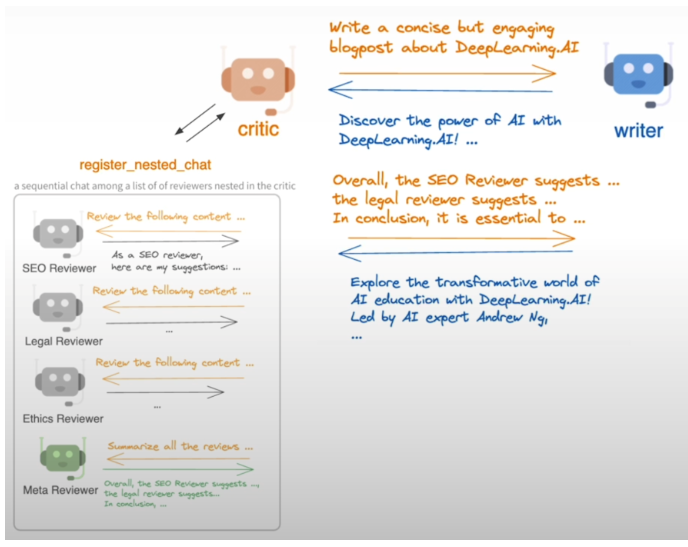

### Additional reviewers

We can now improve our refinement by using multiple agent that each specialize in a specific type of criticism and refinement. We're going to add 3 different types of critics:
* A **SEO reviewer**: This reviewer will provide improvements to optimize the content produced for search engines
* A **Legal reviewer**: This reviewer will provide criticisms to ensure that the content produced is legally compliant
* An **Ethics reviewer**: This reviewer will ensure that the content is ethically sound


In [126]:
## Agent 1
writer = autogen.AssistantAgent(
    name = 'Writer',
    system_message= "You are a writer. You write engaging and concise"
        "blogposts(with title) on given topics. You must polish your"
        "writing based on the feedback you receive and give refined"
        "version. Only return you final work without additional comments",
    llm_config = llm_config,
)
## Agent 2
critic = autogen.AssistantAgent(
    name = 'Critic',
    system_message="You are a critic. You review the work of"
                    "the writer and provide constructive"
                    "feedback to help improve the quality of the content.",
    llm_config = llm_config,
)

In [127]:
## Agent 3
SEO_reviewer = autogen.AssistantAgent(
    name = "SEO_Reviewer",
    llm_config=llm_config,
    system_message="You are an SEO reviewer, known for "
        "your ability to optimize content for search engines, "
        "ensuring that it ranks well and attracts organic traffic. " 
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role.",    
)

## Agent 4
legal_reviewer = autogen.AssistantAgent(
    name = "Legal_Reviewer",
    llm_config=llm_config,
    system_message="You are a legal reviewer, known for "
        "your ability to ensure that content is legally compliant "
        "and free from any potential legal issues. "
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role.",
    
)

## Agent 5
ethics_reviewer = autogen.AssistantAgent(
    name = "Ethics_Reviewer",
    llm_config=llm_config,
    system_message="You are an ethics reviewer, known for "
        "your ability to ensure that content is ethically sound "
        "and free from any potential ethical issues. " 
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role. ",    
)

#### Meta Review 


Since all of these reviews is going to be a lot of data, we are going to add another agent who is going to play the role of a meta-reviewer, a reviewer that is going to gather the reviews of all other reviewers and provide a summary to the writer.

In [130]:
meta_reviewer = autogen.AssistantAgent(
    name="Meta_Reviewer",
    llm_config=llm_config,
    system_message="You are a meta reviewer, you aggregate and review "
    "the work of other reviewers and give a final suggestion on the content.",
)

### Chat orchestration

In [133]:
#this msg is sent by critic Agent other 3 SEO,Legal,Ethics agents for feedback
def reflection_message(recipient, messages, sender, config):
    return f'''Review the following content. 
            \n\n {recipient.chat_messages_for_summary(sender)[-1]['content']}'''

**Main chat**:  
1. Critic -> Writer : Initial task (*"Write a concise but engaging blogpost ..."*)
2. Writer -> Critic : First version of the `blogpost`, this will trigger the **nested chat**

**Nested chat**:
1. Critic -> SEO reviewer: *"Review the following content: `blogpost`"*
2. SEO reviewer -> Critic: `SEO review` with context `{'Reviewer': '', 'Review': ''}` 
3. Critic -> Legal reviewer: *"Review the following content: `blogpost`"*
4. Legal reviewer -> Critic: `Legal review` with context `{'Reviewer': '', 'Review': ''}` 
5. Critic -> Ethics reviewer: *"Review the following content: `blogpost`"*
6. Ethics reviewer -> Critic: `Ethics review` with context `{'Reviewer': '', 'Review': ''}` 
7. Critic -> Meta reviewer: *"Aggregrate feedback from all reviewers and give final suggestions on the writing."*
8. Meta reviewer -> Critic: Summary of all reviews with all contexts `{'Reviewer': '', 'Review': ''}`

**End of nested chat**

**Back to the main chat**:
1. Critic -> Writer : Summary of all reviews with all contexts `{'Reviewer': '', 'Review': ''}`
2. Writer -> Critic : Refined version of the blogpost based on all reviews.

Since we've already seen how to define chats one by one, we'll define our nested chat all at once in a list this time:

In [135]:
review_chats=[
    {
        "recipient":SEO_reviewer,  ## Always only talks to critic
        "message":reflection_message,
        "summary_method":"reflection_with_llm",
        "summary_args":
            {
            "summary_prompt": 
            "Return review into a JSON object only:"
            "{'Reviewer':'','Review':''}.Here Reviewer should be your role",
            },
        "max_turns":1},
    
    {"recipient":legal_reviewer, ## Always only talks to critic
        "message":reflection_message,
        "summary_method":"reflection_with_llm",
        "summary_args":
            {
            "summary_prompt": 
            "Return review into a JSON object only:"
            "{'Reviewer':'','Review':''}.Here Reviewer should be your role",
            },
        "max_turns":1},
    
    {"recipient":ethics_reviewer,   ## Always only talks to critic
        "message":reflection_message,   
        "summary_method":"reflection_with_llm",
        "summary_args":
            {
            "summary_prompt":
            "Return review into a JSON object only:"
            "{'Reviewer':'','Review':''}.Here Reviewer should be your role",
            },
        "max_turns":1},

    {"recipient": meta_reviewer, ## Always only talks to critic
        "message": "Aggregrate feedback from all reviewers and give final suggestions on the writing.", 
         "max_turns": 1},
]

save and register this nested chat as a chat that will be triggered when the writer will contact the critic:

In [137]:
critic.register_nested_chats(
    review_chats,
    trigger=writer,  # this chat is triggered only when writer contacts critic 
)

In [138]:
#initiate the chat 
chat_results = critic.initiate_chat(
    recipient=writer,
    message=task,
    max_turns=2,
    summary_method="last_msg"
)

Critic (to Writer):


        Write a concise but engaging blogpost about
        https://medium.com/. Make sure the blogpost is 
        within 200 words.
        

--------------------------------------------------------------------------------
Writer (to Critic):

**Discovering Medium: A Platform for Thoughtful Voices**

In an age where content is abundant yet often lacks depth, Medium emerges as a refreshing oasis for writers and readers alike. Launched in 2012, this online publishing platform allows individuals to share stories, ideas, and insights, breaking away from the constraints of traditional blogging.

What sets Medium apart is its emphasis on quality over quantity. Writers can be anyone from seasoned authors to budding storytellers, enabling a diverse range of perspectives. The platform’s sleek interface and user-friendly features encourage thoughtful engagement, making it easy to read, clapp, and share ideas with a community of like-minded individuals.

Medium also champi

## Why does this matter?

One of the main weaknesses of LLMs like chatGPT, as you probably have noticed yourself if you've been using them, is that:
* when provided with complex tasks composed of several requirements, the LLM will most likely not accomplish all requirements properly: with nested chats, you can ensure that all requirements are all considered.
* LLMs very rarely directly provide the result you want in one step, you then have to keep asking them for specific refinements on the initial content: with nested chats, if you often ask for the same type of refinements, you can automatize this process to always accomplish these refinements.